<a href="https://colab.research.google.com/github/gvarnavi/generative-art-iap/blob/master/01.14-Tuesday/03_geometric-fractals-solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Geometric Fractals
Geometric fractals are formed by repeating a pattern or action at smaller and smaller scales. The following are examples of some geometric fractals:
![fractal-examples](https://drive.google.com/uc?id=1TVGEVY3-PRm_dJaGEbTTLnEjpOWF0pnS)

# Koch curve
Repetition at smaller scales lends itself to a recursive implementation in code. We will look at how to do this with the **Koch curve**:
![koch-curve](https://drive.google.com/uc?id=1K2iDHuBmvWVSClFlIQK8dYnS4NzlNftc)

The Koch curve is constructed by subdividing a segment into thirds, placing an equilateral triangle in the middle third, and removing its base.
The length of the Koch curve grows by $4/3$ at each iteration. This means that in the limit of infinite iterations, the Koch curve traverses an infinite distance, though it is contained in a finite area!

Below, we will write a function which recursively calculates line segment positions following the Koch curve to a specified number of iterations (the depth). Let's look at an example layout for this function. ```make_koch_curve``` is a function that will take in the number of desired iterations to perform, and make the first call to a recursive function ```koch_curve_recursive```, setting off the cascade of segment subdivisions. The syntax for the recursive function is

```koch_curve_recursive```(iterations, $x_i,y_i,r,\theta$, segments)

The middle four arguments tell us how to define a line segment: Specify the x and y coordinates $(x_i,y_i)$ of the first endpoint, the length $r$, and the orientation $\theta$ with respect to the horizontal. We also supply the number of iterations, and a running list in which to store segment endpoints for drawing.

Let's give our wrapper ```make_koch_curve``` function some default arguments for segment initialization. By default, we would like our base line to start at the origin, and extend horizontally to a length $r=1$.

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#                               *** your code here ***
def make_koch_curve(iterations, xi=0, yi=0, r=1, theta=0):
    '''Draw the Koch curve to the specified number of iterations
       and initial condition.'''
    if iterations < 1:
        raise ValueError('Iteration must be greater than zero.')
        
    segments = []
    koch_curve_recursive(iterations, xi, yi, r, theta, segments)
    
    # determine the last endpoint
    xf = xi + r*np.cos(theta)
    yf = yi + r*np.sin(theta)
    segments += [[xf, yf]]     # add the last endpoint - we'll see why!
    return np.array(segments)  # return an array whose first column stores x,
                               # and second column stores y coordinates.

# Base case
Let's implement the base case of ```koch_curve_recursive``` - when recursion stops.



In [0]:
def koch_curve_recursive(i, xi, yi, r, theta, segments):
    '''i - the number of iterations of the Koch curve to perform.
       xi - the x-coordinate of the first endpoint of the segment.
       yi - the y-coordinate of the first endpoint of the segment.
       r - the length of the segment.
       theta - the angle at which to place the segment, relative to the horizontal.
       segments - a list in which to accumulate segment coordinates.
    '''
        
    # base case: store the first endpoint of the segment.
    if i == 1:
        segments += [[xi,yi]]

We can see that in the base case, all we do is append the starting endpoint of the segment to our accumulating list of segment endpoints to draw. So, let's test the base case:

In [3]:
curve = make_koch_curve(1) # use the default initialization
print(curve)

[[0. 0.]
 [1. 0.]]


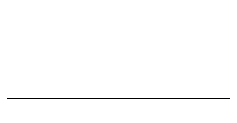

In [4]:
fig, ax = plt.subplots(1,1,figsize=(4,2))
ax.plot(curve[:,0], curve[:,1], color='k', linewidth=1)
ax.set_xlim(0,1); ax.set_ylim(-0.1,0.5)
ax.axis('off')
plt.show()

It's a horizontal line, just as we expect! Next, let's extend our recursive ```koch_curve``` to include iterations > 1.

# Recursive subdivision
Instead of our straight segment, we want to subdivide the length into four pieces following the geometry of the Koch curve.

![koch-segments](https://drive.google.com/uc?id=1oYIvvh0Zpx5d4-c2NCM_HOBWYtpaCVum)

Some trigonometry is needed - the following figure shows an example for getting the new endpoint, length, and orientation of the second segment.
![koch-segments](https://drive.google.com/uc?id=1KzDPxHeWv3D4DcaaGZh92-LGUbymRmQC)


In [0]:
def koch_curve_recursive(i, xi, yi, r, theta, segments):
    '''xi - the x-coordinate of the first endpoint of the segment.
       yi - the y-coordinate of the first endpoint of the segment.
       r - the length of the segment.
       theta - the angle at which to place the segment, relative to the horizontal.
       i - the number of iterations of the Koch curve to perform.
       segments - a list in which to accumulate segment coordinates.
    '''
        
    # base case: store the endpoint of the segment.
    if i == 1:
        segments += [[xi,yi]]

    # recursively set up four new segments.
    else:
        # first segment: starts at current endpoint, no rotation.
        # *** your code here ***
        x1 = xi
        y1 = yi
        koch_curve_recursive(i-1, x1, y1, r/3, theta, segments)
        
        # second segment: starts r/3 along current heading, 60 degrees counterclockwise.
        x2 = xi + r/3*np.cos(theta)
        y2 = yi + r/3*np.sin(theta)
        koch_curve_recursive(i-1, x2, y2, r/3, theta + np.pi/3, segments)
        
        # third segment: starts at the second endpoint of (x1,y1) segment, 60 degrees clockwise.
        x3 = x2 + r/3*np.cos(theta + np.pi/3)
        y3 = y2 + r/3*np.sin(theta + np.pi/3)
        koch_curve_recursive(i-1, x3, y3, r/3, theta - np.pi/3, segments)
        
        # fourth segment: starts 2r/3 along current heading, no rotation.
        x4 = xi + 2*r/3*np.cos(theta)
        y4 = yi + 2*r/3*np.sin(theta)
        koch_curve_recursive(i-1, x4, y4, r/3, theta, segments)

Let's plot iterations 1 through 4:

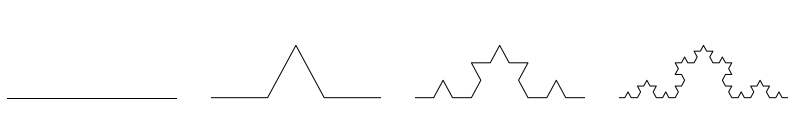

In [6]:
fig, axes = plt.subplots(1,4,figsize=(14,2)) # initialize four axes side by side
for i, ax in enumerate(axes.flat):
    curve = make_koch_curve(i+1) # increment the number of iterations each time
    ax.plot(curve[:,0], curve[:,1], color='k', linewidth=1)
    ax.set_xlim(0,1); ax.set_ylim(-0.1,0.5)
    ax.axis('off')
plt.show()

You may be wondering why our base case only returns the leading endpoint of each segment. Although it may not be obvious, our recursive function will traverse and store all segments in such a way that they will be *in order*. So, the second endpoint of segment one is the first endpoint of segment two, and so on. Both pairs of endpoints will be stored for all except the very last segment, so we add on its endpoint after recursion is complete.

# Self-similarity
A key property of fractals is their self-similarity at smaller and smaller scales. Let's make an animation that visually captures this. First, we'll generate a Koch curve with 11 iterations.

In [7]:
%%time
curve = make_koch_curve(11)

CPU times: user 4.35 s, sys: 252 ms, total: 4.6 s
Wall time: 4.61 s


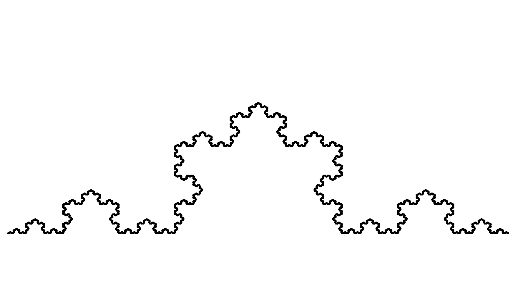

In [8]:
fig, ax = plt.subplots(1,1,figsize=(9,5))
ax.plot(curve[:,0], curve[:,1], color='k', linewidth=1)
ax.set_xlim(0,1); ax.set_ylim(-0.1,0.5)
ax.axis('off')
plt.show()

The level of detail we've produced is too small to view at once. Let's make an animation that progressively zooms into our fractal to see!

In [0]:
# setup code for animation
import matplotlib.animation as animation
from IPython.display import HTML

# generate a sequence of plots assembled into an animation.
def make_animation(curve, zoom):
    frames = 300
    fac = np.logspace(0, np.log10(zoom), frames) # how much to zoom at each frame
    fig, ax = plt.subplots(1,1,figsize=(9,5))
    ln, = ax.plot(curve[:,0], curve[:,1], color='k', linewidth=1)
    ax.set_xlim(0,1); ax.set_ylim(-0.1,0.5)
    ax.axis('off')

    def animate(i):
        '''Plot updates for animation.'''
        ln.set_data(fac[i]*curve[:,0],fac[i]*curve[:,1])
        return ln,

    ani = animation.FuncAnimation(fig, animate, frames=frames, interval=50, blit=True)
    plt.close(fig)
    return ani

Use the code to progressively magnify the curve up to $3^5=243$ times the original (Note: this will also take about 20 seconds or so):

In [10]:
# create animation
ani = make_animation(curve, 243)

# Display the animation
HTML(ani.to_html5_video())

# Challenge!
Draw the Koch snowflake by combining three rotated Koch curves, each at 6 iterations.

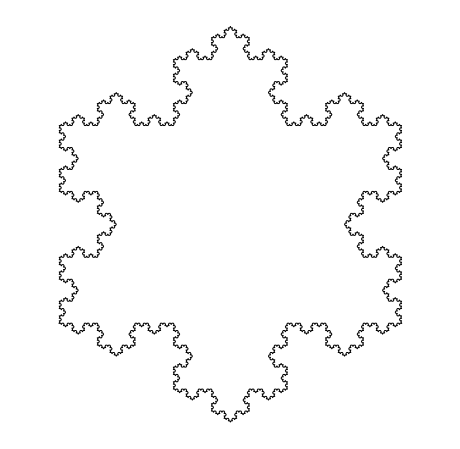

In [11]:
iterations = 6
#                              *** your code here ***
curve1 = make_koch_curve(iterations, 0, 0, 1, np.pi/3)
curve2 = make_koch_curve(iterations, 1*np.cos(np.pi/3), 1*np.sin(np.pi/3), 1, -np.pi/3)
curve3 = make_koch_curve(iterations, 1, 0, 1, -np.pi)

# plotting
fig, ax = plt.subplots(1,1,figsize=(8,8))
for curve in [curve1, curve2, curve3]:
  ax.plot(curve[:,0], curve[:,1], color='k', linewidth=1)
ax.axis('equal')
ax.axis('off')
plt.show()